# Justin's Workbook for Zillow Clustering Exploration

In [64]:
#imports
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
from env import host, user, password

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Tools and Modules
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data Acquisition

In [2]:
#Acquire Data using acquire module and get_zillow_data function
df = acquire.get_zillow_data(cached=True)

#Return the shape of the dataframe
df.shape

(77413, 67)

In [3]:
len(df.parcelid.unique())

77413

In [4]:
df.fips.isna().sum()

33

In [5]:
df.fips.dropna(axis=0,inplace=True)

In [6]:
df.fips.value_counts()

6037.0    50550
6059.0    20593
6111.0     6237
Name: fips, dtype: int64

In [7]:
df.head()

,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,bathroomcnt,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,NaN,NaN,2.0,NaN,NaN,NaN,10711855,1087254,NaN,2.0,...,NaN,6.037113e+13,-0.007357,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,NaN,NaN,2.0,NaN,NaN,1.0,10711877,1072280,NaN,2.0,...,NaN,6.037113e+13,0.021066,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,NaN,NaN,2.0,NaN,NaN,1.0,10711888,1340933,NaN,2.0,...,NaN,6.037113e+13,0.077174,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,10711910,1878109,NaN,2.0,...,NaN,6.037113e+13,-0.041238,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,NaN,NaN,2.0,NaN,NaN,NaN,10711923,2190858,NaN,2.0,...,NaN,6.037113e+13,-0.009496,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


## Data Preparation

In [8]:
df = prepare.wrangle_zillow()

In [9]:
df.shape

(69760, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69760 entries, 10711855 to 162960814
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   69760 non-null  float64
 1   bedroomcnt                    69760 non-null  float64
 2   buildingqualitytypeid         69760 non-null  float64
 3   calculatedfinishedsquarefeet  69760 non-null  float64
 4   latitude                      69760 non-null  float64
 5   longitude                     69760 non-null  float64
 6   rawcensustractandblock        69760 non-null  float64
 7   regionidcity                  69760 non-null  float64
 8   regionidzip                   69760 non-null  float64
 9   structuretaxvaluedollarcnt    69760 non-null  float64
 10  landtaxvaluedollarcnt         69760 non-null  float64
 11  logerror                      69760 non-null  float64
 12  LA                            69760 non-null  uin

In [11]:
df.head(1)

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,logerror,LA,Orange,Ventura,age,taxrate,acres,cola,hot_month_sale,has_heat
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.0,3.0,8.0,2107.0,34.222559,-118.617387,6.037113e+07,12447.0,96339.0,249655.0,...,-0.007357,1,0,0,45.0,1.227188,0.210239,1,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69760 entries, 10711855 to 162960814
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   69760 non-null  float64
 1   bedroomcnt                    69760 non-null  float64
 2   buildingqualitytypeid         69760 non-null  float64
 3   calculatedfinishedsquarefeet  69760 non-null  float64
 4   latitude                      69760 non-null  float64
 5   longitude                     69760 non-null  float64
 6   rawcensustractandblock        69760 non-null  float64
 7   regionidcity                  69760 non-null  float64
 8   regionidzip                   69760 non-null  float64
 9   structuretaxvaluedollarcnt    69760 non-null  float64
 10  landtaxvaluedollarcnt         69760 non-null  float64
 11  logerror                      69760 non-null  float64
 12  LA                            69760 non-null  uin

In [13]:
df.describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,logerror,LA,Orange,Ventura,age,taxrate,acres,cola,hot_month_sale,has_heat
count,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000,6.976000e+04,69760.000000,69760.000000,6.976000e+04,...,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000,69760.000000
mean,2.264507,3.014421,6.362729,1746.806221,34.002478,-118.193976,6.049605e+07,33445.884332,96611.149011,1.866880e+05,...,0.016992,0.633730,0.284547,0.081723,47.941614,1.308341,0.634696,0.229774,0.534662,0.648294
std,0.938964,1.001880,1.370831,924.141318,0.267991,0.360967,2.067142e+05,46445.893515,3996.797405,2.269199e+05,...,0.167085,0.481788,0.451202,0.273944,23.001650,0.494579,2.731145,0.420690,0.498801,0.477506
min,1.000000,1.000000,1.000000,360.000000,33.339527,-119.475265,6.037101e+07,3491.000000,95982.000000,4.400000e+01,...,-4.655420,0.000000,0.000000,0.000000,1.000000,0.009372,0.005418,0.000000,0.000000,0.000000
25%,2.000000,2.000000,6.000000,1166.000000,33.803878,-118.410000,6.037312e+07,12447.000000,96206.000000,8.309175e+04,...,-0.023564,0.000000,0.000000,0.000000,30.000000,1.161956,0.137741,0.000000,0.000000,0.000000
50%,2.000000,3.000000,6.000000,1510.000000,34.013450,-118.163691,6.037621e+07,25218.000000,96411.000000,1.341005e+05,...,0.006697,1.000000,0.000000,0.000000,47.000000,1.225106,0.167883,0.000000,1.000000,1.000000
75%,3.000000,4.000000,7.000000,2054.000000,34.174131,-117.913460,6.059052e+07,45457.000000,96989.000000,2.141835e+05,...,0.038452,1.000000,1.000000,0.000000,63.000000,1.336543,0.246677,0.000000,1.000000,1.000000
max,13.000000,11.000000,12.000000,21929.000000,34.818767,-117.572338,6.111009e+07,396556.000000,399675.000000,9.164901e+06,...,5.262999,1.000000,1.000000,1.000000,139.000000,49.364739,160.032369,1.000000,1.000000,1.000000


## Data Exploration

### Check for Outliers

In [15]:
def outlier_label(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 1
    else:
        return 0

In [16]:
columns_to_check = ['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror', 'age', 'taxrate', 'acres']

for col in columns_to_check:
    quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
    iqr = quartile_03 - quartile_01
    
    lower_bound = quartile_01 -(3 * iqr)
    upper_bound = quartile_03 +(3 * iqr)
    
    df['is_outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

The lower and upper bound of the range for 'bathroomcnt' respectively is: -1.0 and 6.0
The lower and upper bound of the range for 'bedroomcnt' respectively is: -4.0 and 10.0
The lower and upper bound of the range for 'calculatedfinishedsquarefeet' respectively is: -1498.0 and 4718.0
The lower and upper bound of the range for 'latitude' respectively is: 32.69312074999998 and 35.28488825000002
The lower and upper bound of the range for 'longitude' respectively is: -119.89961924999999 and -116.42384100000001
The lower and upper bound of the range for 'rawcensustractandblock' respectively is: 59720887.482094 and 61242751.692933
The lower and upper bound of the range for 'structuretaxvaluedollarcnt' respectively is: -310183.5 and 607458.75
The lower and upper bound of the range for 'landtaxvaluedollarcnt' respectively is: -773788.0 and 1224750.5
The lower and upper bound of the range for 'logerror' respectively is: -0.20961182049735 and 0.224499326471625
The lower and upper bound of the ran

In [17]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror', 'LA',
       'Orange', 'Ventura', 'age', 'taxrate', 'acres', 'cola',
       'hot_month_sale', 'has_heat', 'is_outlier'],
      dtype='object')

In [18]:
outliers = df['is_outlier'] == 1 # filter for outliers
df[outliers][['bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror', 'age', 'taxrate', 'acres']].groupby('parcelid').head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,logerror,age,taxrate,acres
parcelid,,,,,,,,,,,,
10713993,3.0,3.0,1574.0,34.234857,-118.604879,6.037113e+07,225385.0,338078.0,0.009798,66.0,1.225220,0.591414
10714531,3.0,4.0,2224.0,34.219815,-118.608787,6.037113e+07,280031.0,151665.0,0.036466,16.0,1.212837,2.232530
10714536,3.0,4.0,2233.0,34.220299,-118.609180,6.037113e+07,237900.0,287100.0,0.041154,16.0,1.209002,2.232530
10714563,3.0,4.0,2224.0,34.220897,-118.609434,6.037113e+07,244931.0,212631.0,0.056448,15.0,1.229639,2.142264
10714567,3.0,4.0,2224.0,34.221109,-118.609297,6.037113e+07,252600.0,267400.0,0.033151,15.0,1.225102,2.142264
...,...,...,...,...,...,...,...,...,...,...,...,...
17300762,4.5,5.0,2362.0,34.213658,-118.675538,6.111008e+07,653512.0,550324.0,0.027908,29.0,1.144312,2.289991
17300763,5.5,5.0,3104.0,34.214033,-118.675125,6.111008e+07,581000.0,1337000.0,0.330192,35.0,1.124246,2.059986
17300810,8.0,5.0,5076.0,34.214164,-118.706471,6.111008e+07,572127.0,728163.0,0.333271,19.0,1.101713,1.669995


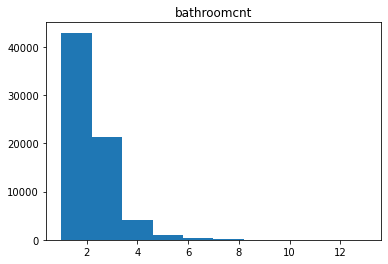

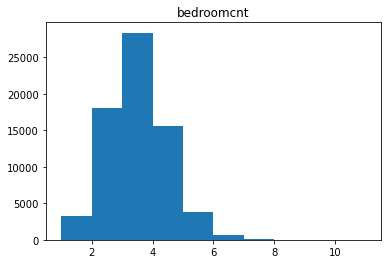

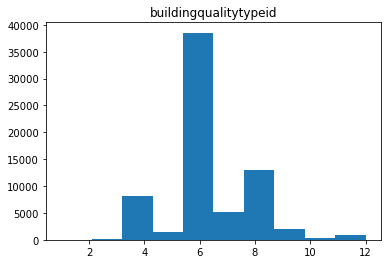

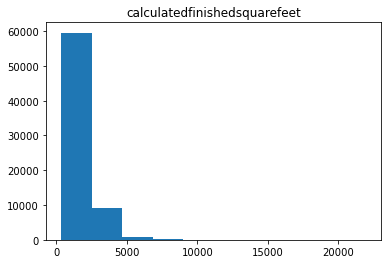

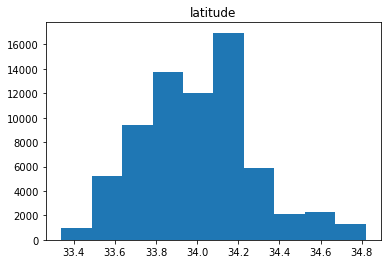

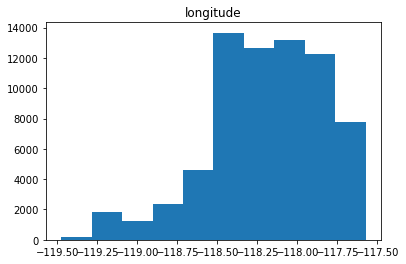

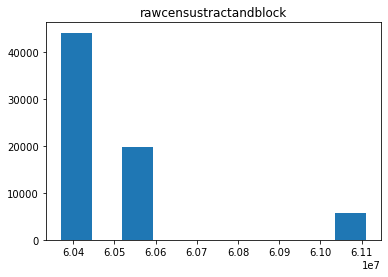

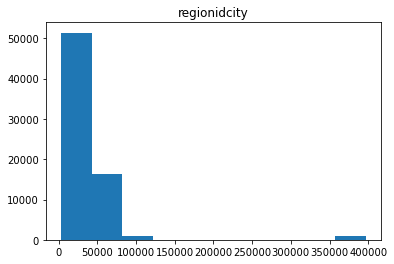

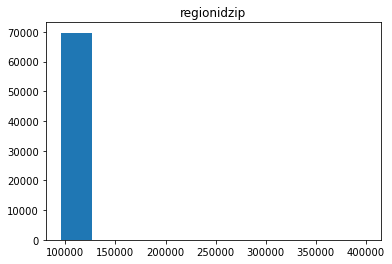

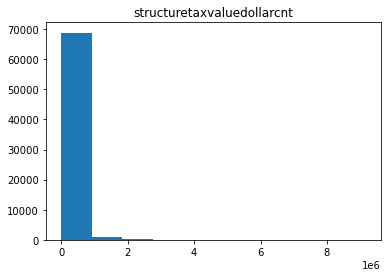

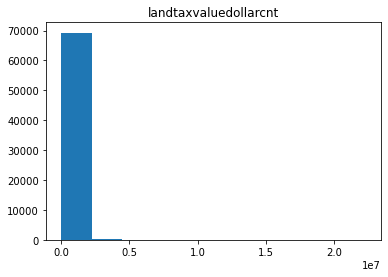

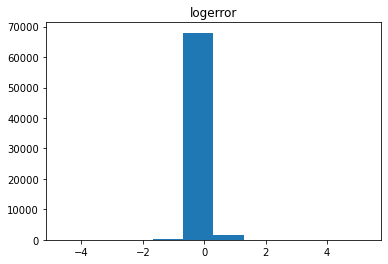

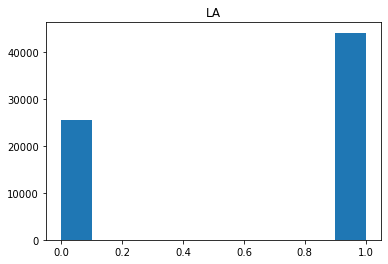

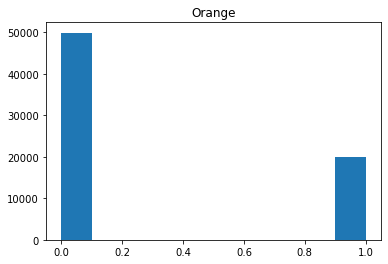

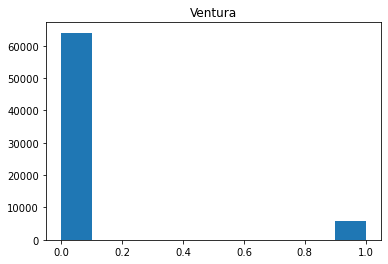

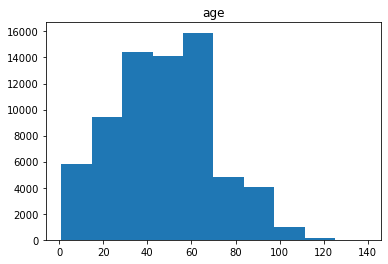

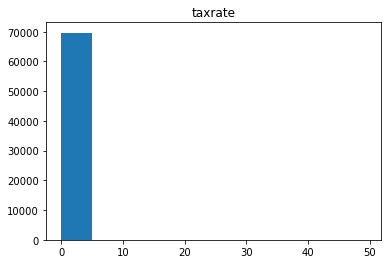

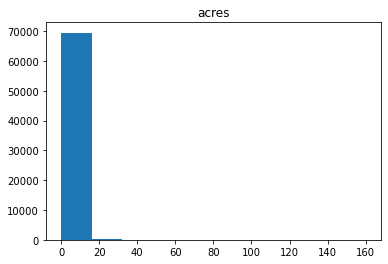

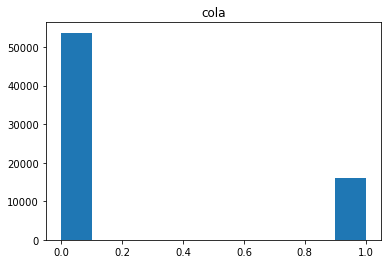

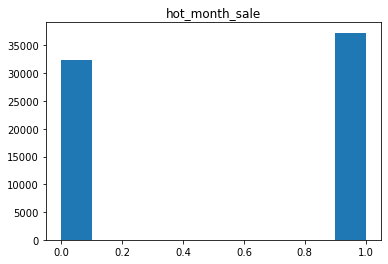

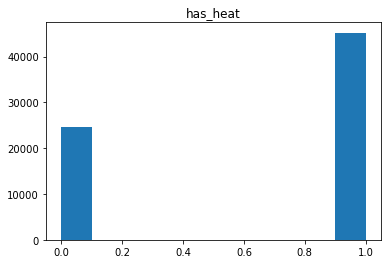

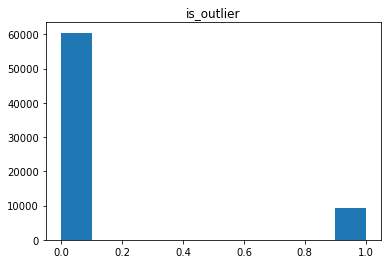

In [19]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [20]:
df.is_outlier.value_counts()

0    60459
1     9301
Name: is_outlier, dtype: int64

### Separate Counties in Individual Dataframes

In [21]:
#Create LA County Dataframe
df_la = df[df.LA == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_la.shape

(44209, 19)

In [22]:
#Create Ventura County df
df_vent = df[df.Ventura == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_vent.shape

(5701, 19)

In [23]:
#Create Orange County df
df_orange = df[df.Orange == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_orange.shape

(19850, 19)

#### Starting with Analysis for LA County Props

In [24]:
partitions = explore.split(df_la, target_var='logerror')

In [25]:
train = partitions[0]

In [26]:
#Separate logerror into quantiles
train['logerror_class'] = pd.qcut(train.logerror, q=4, labels=['q1', 'q2', 'q3', 'q4'])

In [27]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror',
       'age', 'taxrate', 'acres', 'cola', 'hot_month_sale', 'has_heat',
       'is_outlier', 'logerror_class'],
      dtype='object')

In [28]:
categorical_target = 'logerror_class'
continuous_target = 'logerror'
binary_vars = ['hot_month_sale', 'has_heat','is_outlier', 'cola']
quant_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'age', 'taxrate', 'acres']

#### Univariate Exploration

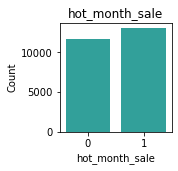

   hot_month_sale  Count  Percent
1               1  13038    52.67
0               0  11718    47.33
_________________________________________________________________


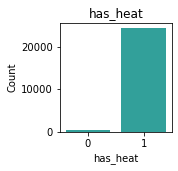

   has_heat  Count  Percent
1         1  24378    98.47
0         0    378     1.53
_________________________________________________________________


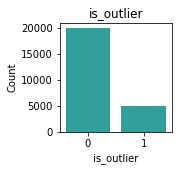

   is_outlier  Count  Percent
0           0  19840    80.14
1           1   4916    19.86
_________________________________________________________________


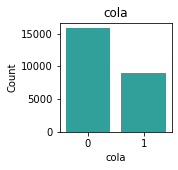

   cola  Count  Percent
0     0  15817    63.89
1     1   8939    36.11
_________________________________________________________________


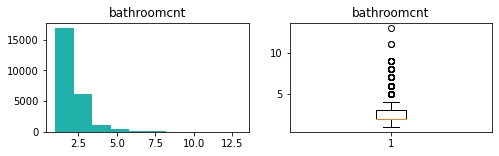

count    24756.000000
mean         2.202294
std          0.980087
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bathroomcnt, dtype: float64


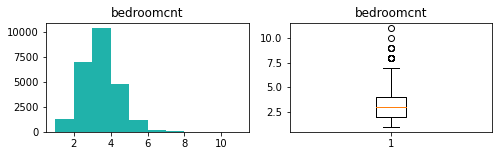

count    24756.000000
mean         2.942196
std          0.991425
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedroomcnt, dtype: float64


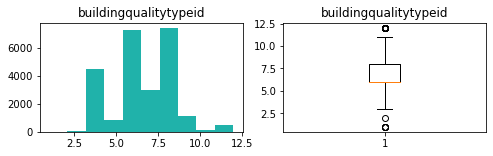

count    24756.000000
mean         6.572992
std          1.677842
min          1.000000
25%          6.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64


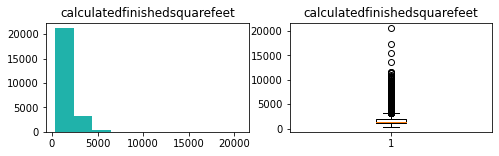

count    24756.000000
mean      1674.113589
std        905.705034
min        360.000000
25%       1132.000000
50%       1448.000000
75%       1936.000000
max      20612.000000
Name: calculatedfinishedsquarefeet, dtype: float64


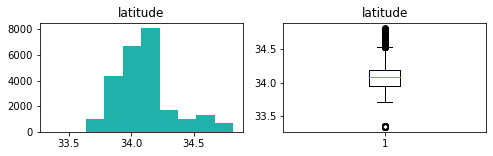

count    24756.000000
mean        34.104840
std          0.219448
min         33.339600
25%         33.957836
50%         34.086700
75%         34.189182
max         34.818767
Name: latitude, dtype: float64


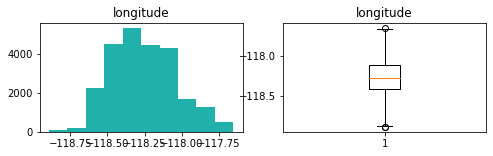

count    24756.000000
mean      -118.257795
std          0.214954
min       -118.892812
25%       -118.420108
50%       -118.277564
75%       -118.114457
max       -117.653901
Name: longitude, dtype: float64


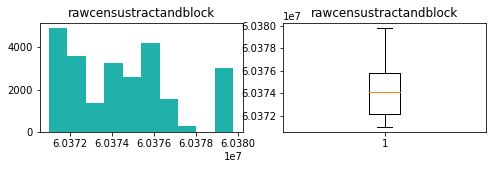

count    2.475600e+04
mean     6.037442e+07
std      2.493091e+03
min      6.037101e+07
25%      6.037218e+07
50%      6.037409e+07
75%      6.037577e+07
max      6.037980e+07
Name: rawcensustractandblock, dtype: float64


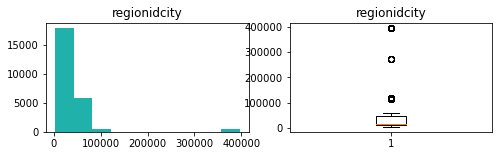

count     24756.000000
mean      35300.539546
std       58107.735805
min        3491.000000
25%       12447.000000
50%       14634.000000
75%       45602.000000
max      396556.000000
Name: regionidcity, dtype: float64


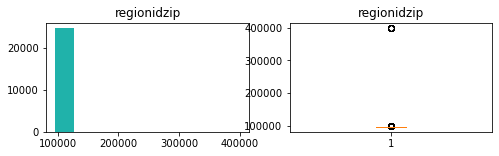

count     24756.000000
mean      96455.658749
std        5792.196588
min       95982.000000
25%       96123.000000
50%       96282.000000
75%       96433.250000
max      399675.000000
Name: regionidzip, dtype: float64


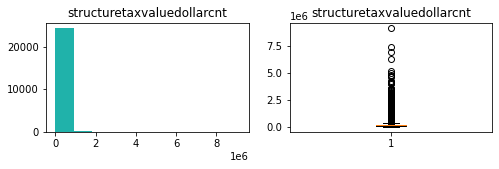

count    2.475600e+04
mean     1.838365e+05
std      2.500680e+05
min      1.320000e+02
25%      8.179725e+04
50%      1.315680e+05
75%      2.044970e+05
max      9.164901e+06
Name: structuretaxvaluedollarcnt, dtype: float64


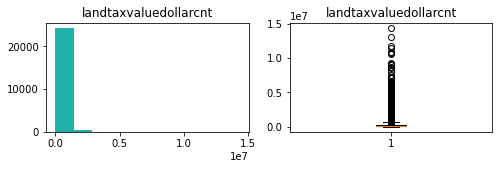

count    2.475600e+04
mean     2.854507e+05
std      4.862875e+05
min      1.610000e+02
25%      6.180000e+04
50%      1.720060e+05
75%      3.362880e+05
max      1.435090e+07
Name: landtaxvaluedollarcnt, dtype: float64


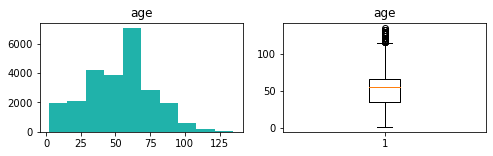

count    24756.000000
mean        53.320852
std         23.804874
min          2.000000
25%         35.000000
50%         56.000000
75%         67.000000
max        135.000000
Name: age, dtype: float64


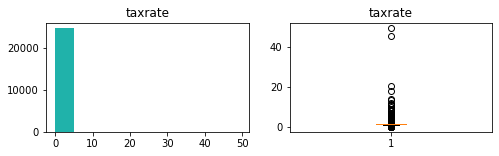

count    24756.000000
mean         1.367298
std          0.585947
min          0.022955
25%          1.208600
50%          1.248063
75%          1.382955
max         49.364739
Name: taxrate, dtype: float64


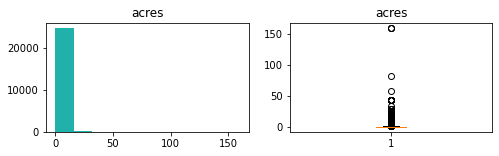

count    24756.000000
mean         0.882032
std          3.117927
min          0.020202
25%          0.139624
50%          0.173531
75%          0.394932
max        160.032369
Name: acres, dtype: float64


In [29]:
explore.explore_univariate(train, binary_vars, quant_vars)

**Univariate Takeaways:**
- 47% of properties were last sold between the 4 month period of May - August (Q2) ==> Definitely the 'hot months' for real estate sales <br>

- Most properties have heat (99%) in LA County

- Haven't removed outliers yet...by the IQR definition with a multiplier of 3, 13% of observations in LA County have an outlier in at least one feature
    - Max bathroom count is 13

- Only 36% of properties in LA County are in the City of Los Angeles

- Buiding Quality Type is not normally distributed...what kind of dist is that?

- Latitude: Most of the properties are below 34.18 latitude. Is COLA lat coordinates above 34.18?

- Longitude is more normally distributed...geographically this seems to make sense to me

- Error in zip code... check property with zip of 399675

- Drop roocnt

- STD for land value and sturcture value is similar

- Tax rate of 49%!??!

- 160 acres!?!?!?


hot_month_sale 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=77558098.5, pvalue=0.03741212882238115)
       chi2   p-value  degrees of freedom
0  5.736782  0.125143                   3

expected:
         0       1       2       3
0  2929.5  2929.5  2929.5  2929.5
1  3259.5  3259.5  3259.5  3259.5


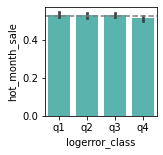


_____________________

has_heat 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=4812650.0, pvalue=0.13667231335194574)
        chi2   p-value  degrees of freedom
0  21.073088  0.000102                   3

expected:
         0       1       2       3
0    94.5    94.5    94.5    94.5
1  6094.5  6094.5  6094.5  6094.5


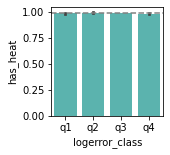


_____________________

is_outlier 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=48427412.5, pvalue=0.44940299529441574)
        chi2   p-value  degrees of freedom
0  25.083571  0.000015                   3

expected:
         0       1       2       3
0  4960.0  4960.0  4960.0  4960.0
1  1229.0  1229.0  1229.0  1229.0


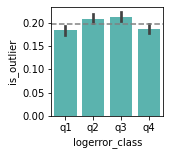


_____________________

cola 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=70847770.0, pvalue=0.7759806598654302)
         chi2       p-value  degrees of freedom
0  140.835088  2.496872e-30                   3

expected:
          0        1        2        3
0  3954.25  3954.25  3954.25  3954.25
1  2234.75  2234.75  2234.75  2234.75


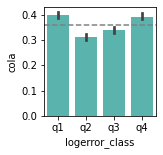


_____________________

bathroomcnt 
____________________



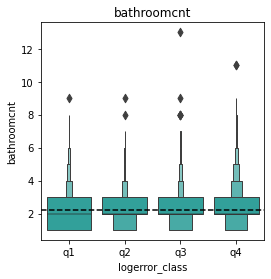

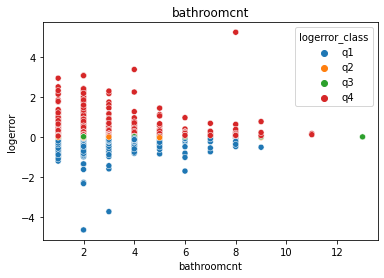

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean               2.114235     2.169656     2.213282     2.312005
std                0.963308     0.869272     0.903064     1.150062
min                1.000000     1.000000     1.000000     1.000000
25%                1.000000     2.000000     2.000000     2.000000
50%                2.000000     2.000000     2.000000     2.000000
75%                3.000000     3.000000     3.000000     3.000000
max                9.000000     9.000000    13.000000    11.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.05908821952816182, pvalue=1.3446691065013837e-20)

____________________

bedroomcnt 
____________________



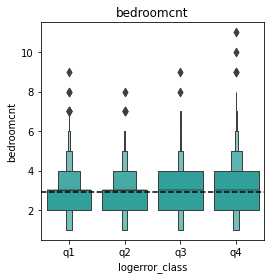

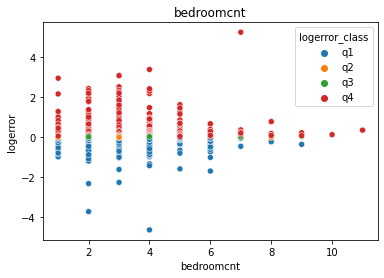

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean               2.870900     2.923089     2.943286     3.031508
std                0.954004     0.944945     0.974223     1.080088
min                1.000000     1.000000     1.000000     1.000000
25%                2.000000     2.000000     2.000000     2.000000
50%                3.000000     3.000000     3.000000     3.000000
75%                3.000000     3.000000     4.000000     4.000000
max                9.000000     8.000000     9.000000    11.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.05138373808689862, pvalue=5.98249603782898e-16)

____________________

buildingqualitytypeid 
____________________



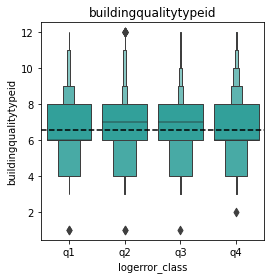

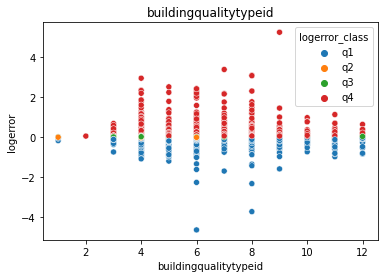

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean               6.482469     6.613669     6.626919     6.568913
std                1.713730     1.611172     1.603646     1.773351
min                1.000000     1.000000     1.000000     2.000000
25%                6.000000     6.000000     6.000000     6.000000
50%                6.000000     7.000000     7.000000     6.000000
75%                8.000000     8.000000     8.000000     8.000000
max               12.000000    12.000000    12.000000    12.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.01194237018332578, pvalue=0.060245945358707496)

____________________

calculatedfinishedsquarefeet 
____________________



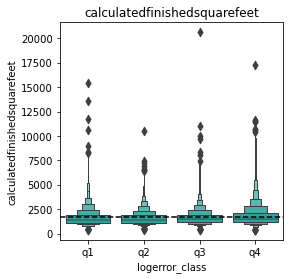

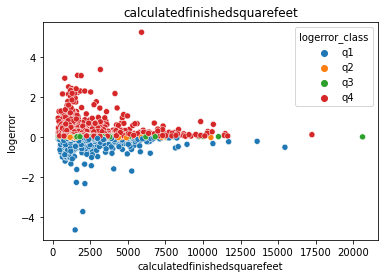

logerror_class            q1            q2            q3            q4
count            6189.000000   6189.000000   6189.000000   6189.000000
mean             1621.629019   1594.771692   1649.259977   1830.793666
std               871.674924    728.126726    816.517315   1136.088137
min               360.000000    412.000000    360.000000    360.000000
25%              1102.000000   1124.000000   1144.000000   1154.000000
50%              1406.000000   1425.000000   1462.000000   1504.000000
75%              1858.000000   1852.000000   1944.000000   2133.000000
max             15450.000000  10525.000000  20612.000000  17245.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06605915843342637, pvalue=2.362096017249077e-25)

____________________

latitude 
____________________



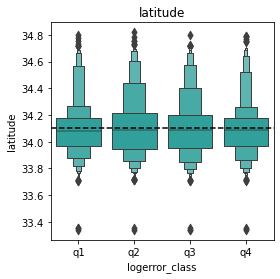

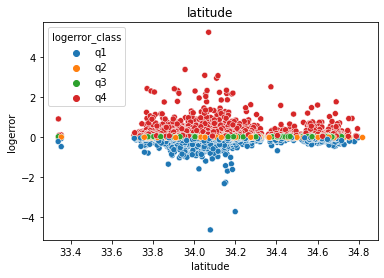

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean              34.100012    34.116624    34.106818    34.095904
std                0.208538     0.237776     0.225531     0.203759
min               33.339600    33.341282    33.340620    33.340851
25%               33.968246    33.944507    33.949960    33.968600
50%               34.080109    34.087064    34.090149    34.089339
75%               34.178474    34.212535    34.198210    34.175599
max               34.796863    34.818767    34.795811    34.794327 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0005592719143389432, pvalue=0.929883330456861)

____________________

longitude 
____________________



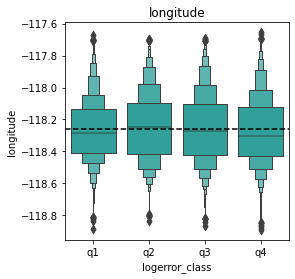

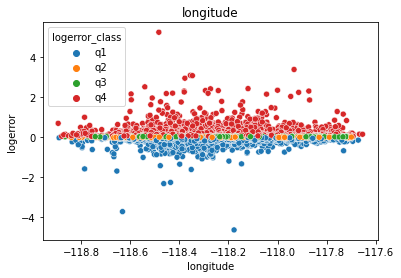

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean            -118.264727  -118.242528  -118.252611  -118.271314
std                0.195931     0.220689     0.222538     0.218485
min             -118.889000  -118.838792  -118.864797  -118.892812
25%             -118.407673  -118.417456  -118.422000  -118.431626
50%             -118.286393  -118.246678  -118.272684  -118.301463
75%             -118.131861  -118.095428  -118.105631  -118.123863
max             -117.671259  -117.697065  -117.691958  -117.653901 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0106557961708999, pvalue=0.09363048808280866)

____________________

rawcensustractandblock 
____________________



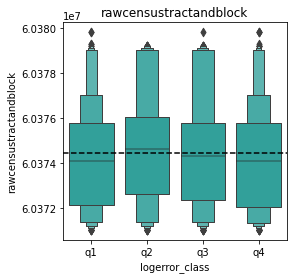

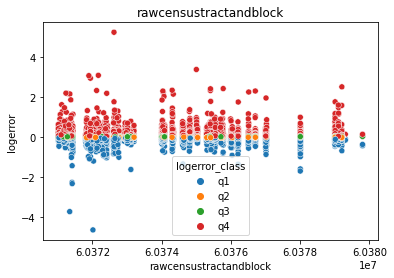

logerror_class            q1            q2            q3            q4
count           6.189000e+03  6.189000e+03  6.189000e+03  6.189000e+03
mean            6.037427e+07  6.037466e+07  6.037452e+07  6.037424e+07
std             2.434500e+03  2.554153e+03  2.524079e+03  2.432985e+03
min             6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%             6.037212e+07  6.037263e+07  6.037235e+07  6.037201e+07
50%             6.037408e+07  6.037460e+07  6.037430e+07  6.037407e+07
75%             6.037575e+07  6.037602e+07  6.037578e+07  6.037575e+07
max             6.037980e+07  6.037920e+07  6.037980e+07  6.037980e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.00971535060649163, pvalue=0.1263695919453701)

____________________

regionidcity 
____________________



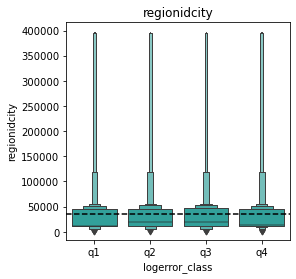

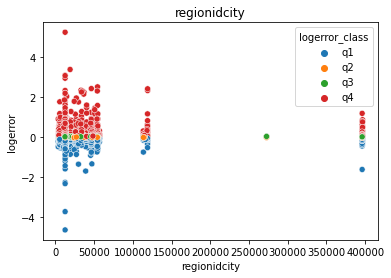

logerror_class             q1             q2             q3             q4
count             6189.000000    6189.000000    6189.000000    6189.000000
mean             35786.850218   35741.754241   36379.509129   33294.044595
std              62913.201559   56890.139701   59225.634769   52913.285582
min               3491.000000    3491.000000    3491.000000    3491.000000
25%              12447.000000   12447.000000   12447.000000   12447.000000
50%              12447.000000   20008.000000   19177.000000   13232.000000
75%              45457.000000   45888.000000   46298.000000   45457.000000
max             396556.000000  396556.000000  396556.000000  396556.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.008856600242645903, pvalue=0.16348135347572085)

____________________

regionidzip 
____________________



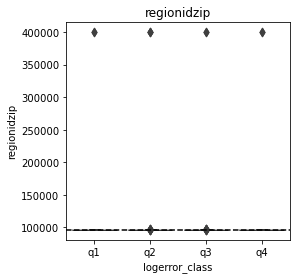

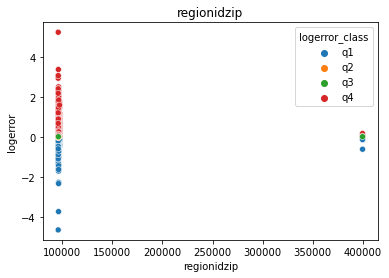

logerror_class             q1             q2             q3             q4
count             6189.000000    6189.000000    6189.000000    6189.000000
mean             96418.078850   96529.278236   96455.290839   96419.987074
std               5463.085735    6685.762556    5461.864258    5461.651449
min              95982.000000   95982.000000   95982.000000   95982.000000
25%              96101.000000   96162.000000   96159.000000   96117.000000
50%              96245.000000   96326.000000   96321.000000   96271.000000
75%              96415.000000   96464.000000   96446.000000   96415.000000
max             399675.000000  399675.000000  399675.000000  399675.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.023116107589417647, pvalue=0.00027540422536220793)

____________________

structuretaxvaluedollarcnt 
____________________



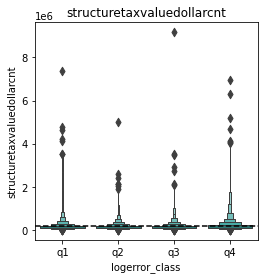

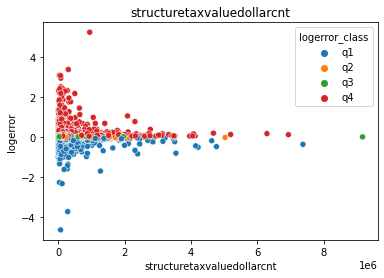

logerror_class            q1            q2            q3            q4
count           6.189000e+03  6.189000e+03  6.189000e+03  6.189000e+03
mean            1.782201e+05  1.699062e+05  1.786445e+05  2.085751e+05
std             2.580493e+05  1.735611e+05  2.169669e+05  3.248295e+05
min             3.282000e+03  1.810000e+02  1.015000e+03  1.320000e+02
25%             7.734600e+04  8.666100e+04  8.816800e+04  7.495000e+04
50%             1.260090e+05  1.331450e+05  1.359750e+05  1.298030e+05
75%             1.962910e+05  1.965000e+05  2.078790e+05  2.216000e+05
max             7.370009e+06  5.025487e+06  9.164901e+06  6.932495e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.01880991152581466, pvalue=0.003079674394631265)

____________________

landtaxvaluedollarcnt 
____________________



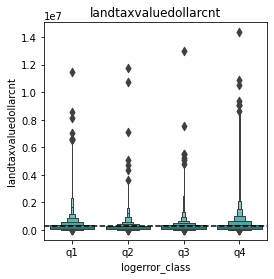

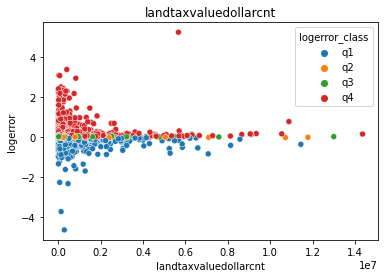

logerror_class            q1            q2            q3            q4
count           6.189000e+03  6.189000e+03  6.189000e+03  6.189000e+03
mean            2.988612e+05  2.431344e+05  2.636957e+05  3.361114e+05
std             5.062204e+05  3.672879e+05  3.870823e+05  6.324660e+05
min             1.365000e+03  4.242000e+03  3.906000e+03  1.610000e+02
25%             6.090000e+04  6.090400e+04  6.827300e+04  5.775600e+04
50%             1.739690e+05  1.648400e+05  1.800000e+05  1.708950e+05
75%             3.500310e+05  3.050580e+05  3.309480e+05  3.722000e+05
max             1.144260e+07  1.177498e+07  1.299520e+07  1.435090e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0052630210442177, pvalue=0.4076423355997053)

____________________

age 
____________________



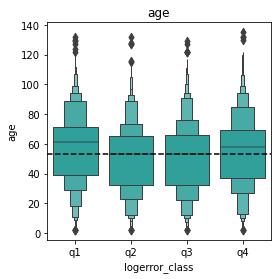

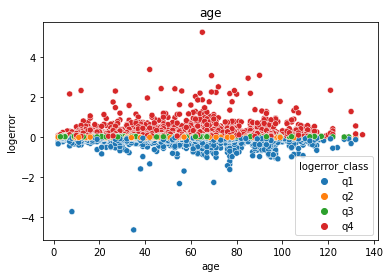

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean              57.655033    50.071417    50.426563    55.130393
std               23.968462    22.738822    23.379275    24.245191
min                2.000000     2.000000     2.000000     2.000000
25%               39.000000    32.000000    32.000000    37.000000
50%               61.000000    53.000000    53.000000    58.000000
75%               71.000000    65.000000    66.000000    69.000000
max              132.000000   132.000000   129.000000   135.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.037029187214622304, pvalue=5.613211328663643e-09)

____________________

taxrate 
____________________



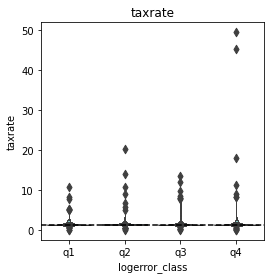

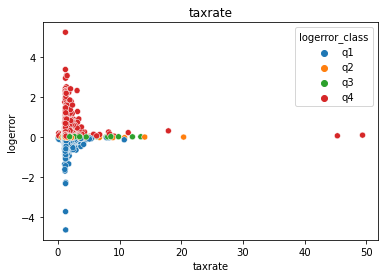

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean               1.362529     1.371263     1.358056     1.377346
std                0.363312     0.449295     0.411916     0.932599
min                0.022955     0.100807     0.148926     0.111118
25%                1.208354     1.208905     1.208452     1.208815
50%                1.245637     1.251963     1.246685     1.248948
75%                1.382091     1.402436     1.374508     1.375108
max               10.737077    20.355610    13.417353    49.364739 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00197462965892976, pvalue=0.7560487491088848)

____________________

acres 
____________________



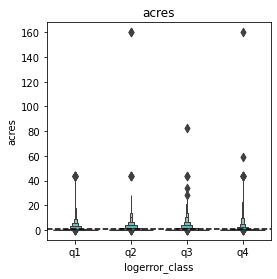

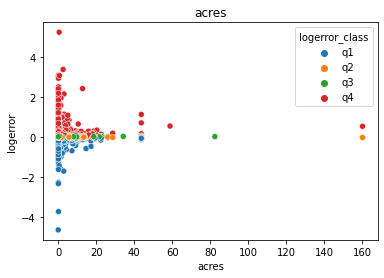

logerror_class           q1           q2           q3           q4
count           6189.000000  6189.000000  6189.000000  6189.000000
mean               0.793404     0.975248     0.948825     0.810654
std                2.443008     3.852455     2.782198     3.211568
min                0.020868     0.020546     0.020202     0.021373
25%                0.137856     0.139646     0.140680     0.140794
50%                0.172016     0.173439     0.173829     0.178673
75%                0.361019     0.396097     0.421602     0.399541
max               43.713613   160.032369    82.395432   160.032369 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.025147578284959574, pvalue=7.584744411555033e-05)

____________________



In [30]:
explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

**Multivariate Takeaways:**
- Latitude vs Logerror: There is a latitude (>34.3) where log error is more centered around 0
    - Runs stats test for this
- As structuretaxvaluedollarcnt increases, logerror is more centered around 0

### Statistical Testing

- Run a t-test to compare latitude vs logerror
-Steps:
    - Create a categorical variable for properties that have latitudes > 34.3......
    - Formulate Hypothesis
    - Test

#### GEOPY SECTION - IN PROGRESS AND DEBUGGING (WORKING TO VALIDATE INVALID ZIPCODES)

In [31]:
#wrong_zip = train[train.regionidzip == train.regionidzip.max()]

In [32]:
#wrong_zip

In [33]:
#from geopy.geocoders import Nominatim
#import geopy

In [34]:
#geolocator = Nominatim(user_agent="jjjjjjjjjj")

In [35]:
#location = geolocator.reverse('34.154731, -117.954681')
#print(location.address)

In [36]:
#location = geolocator.reverse('34.144255, -117.969104')
#print(location.address)

In [37]:
#wrong_zip['latitude'] = wrong_zip['latitude'].astype(str)

In [38]:
#wrong_zip['longitude'] = wrong_zip['longitude'].astype(str)

In [39]:
#wrong_zip['prop_coordinates'] = wrong_zip[['latitude', 'longitude']].apply(lambda x : '{},{}'.format(x[0],x[1]), axis=1)

In [40]:
#location = geolocator.reverse('34.145644,-117.954984')
#print(location.address)

In [41]:
#def get_adress(df):
#    for x in df['prop_coordinates']:
#        location = geolocator.reverse(f'{x}')
#        return location.address
#    

In [42]:
#for x in wrong_zip:
#    df['prop_address'] = wrong_zip['prop_coordinates'].apply(lambda x: get_adress(wrong_zip))

In [43]:
#wrong_zip

# Explore using wrangle_zillow second 

In [44]:
#Acquire Data using acquire module and get_zillow_data function
df = acquire.get_zillow_data(cached=True)

#Return the shape of the dataframe
df.shape

(77413, 67)

In [45]:
#Prepare the data using wrangle zillow 2
df = prepare.wrangle_zillow_2nd()
df.shape

(69305, 21)

## Separate into three frames by county

In [46]:
#Create LA County Dataframe
df_la = df[df.LA == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_la.shape

(43768, 18)

In [47]:
#Create Ventura County df
df_vent = df[df.Ventura == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_vent.shape

(5695, 18)

In [48]:
#Create Orange County df
df_orange = df[df.Orange == 1].drop(columns = ['LA', 'Ventura', 'Orange']) 
df_orange.shape

(19842, 18)

In [49]:
df.sample(20)

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,...,logerror,LA,Orange,Ventura,age,taxrate,acres,cola,hot_month_sale,has_heat
parcelid,,,,,,,,,,,,,,,,,,,,,
11707491,1.0,2.0,5.0,1056.0,34.006556,-118.289420,6.037232e+07,12447.0,96018.0,34480.0,...,0.004368,1,0,0,105.0,1.267495,0.063453,1,1,0
14290542,4.5,4.0,6.0,3432.0,33.700760,-117.806777,6.059076e+07,27491.0,97018.0,581264.0,...,-0.026951,0,1,0,12.0,1.390374,0.128834,0,1,0
14093734,2.0,3.0,6.0,1596.0,33.786482,-117.976016,6.059088e+07,24832.0,97048.0,86602.0,...,0.052741,0,1,0,62.0,1.284850,0.140496,0,1,0
10930731,2.0,2.0,8.0,917.0,34.157000,-118.367000,6.037126e+07,12447.0,96447.0,91765.0,...,0.002455,1,0,0,45.0,1.201490,0.637603,1,0,1
14602199,2.5,2.0,6.0,1429.0,33.638630,-117.598165,6.059032e+07,15554.0,96993.0,170580.0,...,-0.013195,0,1,0,18.0,1.421242,0.167883,0,1,0
17058919,2.0,3.0,6.0,2318.0,34.427886,-119.291397,6.111001e+07,13091.0,97099.0,315291.0,...,0.043442,0,0,1,60.0,1.068756,1.619995,0,1,0
14043548,2.5,3.0,6.0,1641.0,33.717699,-118.036000,6.059099e+07,25218.0,96967.0,228785.0,...,0.027043,0,1,0,16.0,1.110777,0.074426,0,1,0
14600928,1.5,2.0,6.0,930.0,33.759200,-117.898000,6.059075e+07,47568.0,97006.0,40501.0,...,0.072612,0,1,0,52.0,1.367833,0.167883,0,1,0
11065658,2.0,4.0,6.0,1352.0,34.272778,-118.505253,6.037111e+07,12447.0,96370.0,148013.0,...,0.004045,1,0,0,63.0,1.249665,0.189210,1,1,1


**Analyze By LA County without outliers**

In [50]:
partitions = explore.split(df_la, target_var='logerror')

In [51]:
train = partitions[0]

In [52]:
#Separate logerror into quantiles
train['logerror_class'] = pd.qcut(train.logerror, q=4, labels=['q1', 'q2', 'q3', 'q4'])

In [53]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'logerror',
       'age', 'taxrate', 'acres', 'cola', 'hot_month_sale', 'has_heat',
       'logerror_class'],
      dtype='object')

In [54]:
categorical_target = 'logerror_class'
continuous_target = 'logerror'
binary_vars = ['hot_month_sale', 'has_heat', 'cola']
quant_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'age', 'taxrate', 'acres']

### Univariate Exploration

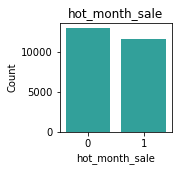

   hot_month_sale  Count  Percent
1               0  12934    52.77
0               1  11575    47.23
_________________________________________________________________


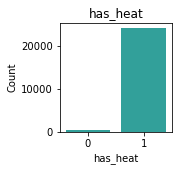

   has_heat  Count  Percent
1         1  24130    98.45
0         0    379     1.55
_________________________________________________________________


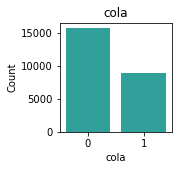

   cola  Count  Percent
0     0  15643    63.83
1     1   8866    36.17
_________________________________________________________________


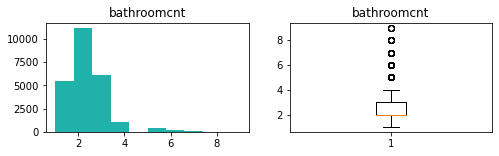

count    24509.000000
mean         2.199967
std          0.967291
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: bathroomcnt, dtype: float64


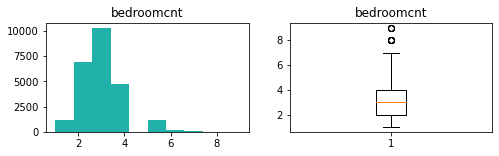

count    24509.000000
mean         2.944796
std          0.981349
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: bedroomcnt, dtype: float64


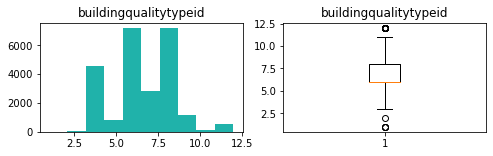

count    24509.000000
mean         6.565221
std          1.691155
min          1.000000
25%          6.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64


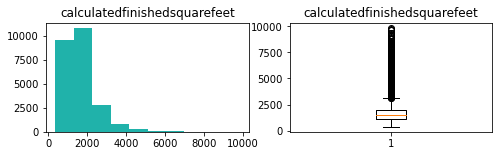

count    24509.000000
mean      1671.764046
std        864.345138
min        360.000000
25%       1132.000000
50%       1452.000000
75%       1949.000000
max       9843.000000
Name: calculatedfinishedsquarefeet, dtype: float64


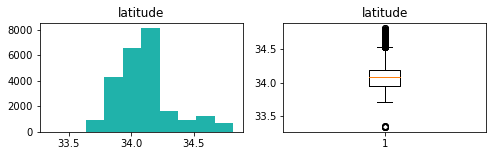

count    24509.000000
mean        34.104628
std          0.219077
min         33.339527
25%         33.957880
50%         34.086175
75%         34.187805
max         34.818767
Name: latitude, dtype: float64


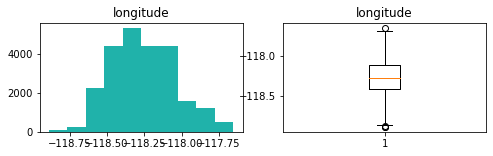

count    24509.000000
mean      -118.258139
std          0.214596
min       -118.889223
25%       -118.418862
50%       -118.275325
75%       -118.114250
max       -117.653901
Name: longitude, dtype: float64


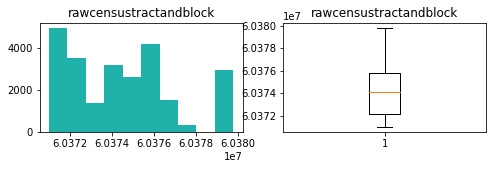

count    2.450900e+04
mean     6.037441e+07
std      2.486854e+03
min      6.037101e+07
25%      6.037217e+07
50%      6.037409e+07
75%      6.037577e+07
max      6.037980e+07
Name: rawcensustractandblock, dtype: float64


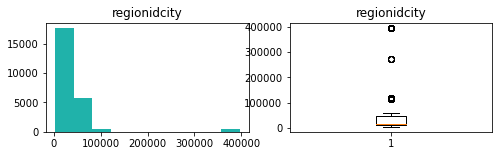

count     24509.000000
mean      35224.961076
std       58065.619780
min        3491.000000
25%       12447.000000
50%       14542.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64


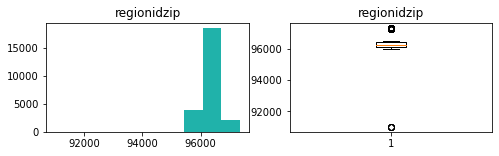

count    24509.000000
mean     96344.371251
std        341.871343
min      91010.000000
25%      96123.000000
50%      96282.000000
75%      96433.000000
max      97344.000000
Name: regionidzip, dtype: float64


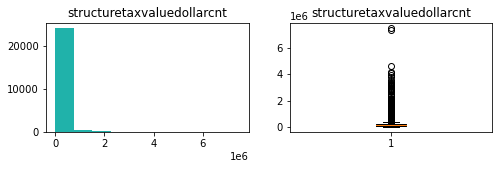

count    2.450900e+04
mean     1.815387e+05
std      2.222030e+05
min      1.320000e+02
25%      8.181700e+04
50%      1.307570e+05
75%      2.066450e+05
max      7.507773e+06
Name: structuretaxvaluedollarcnt, dtype: float64


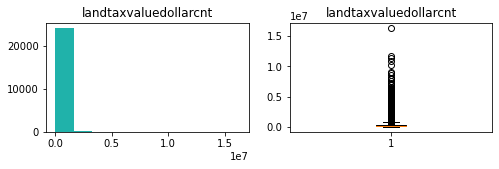

count    2.450900e+04
mean     2.862253e+05
std      4.730672e+05
min      1.393000e+03
25%      6.252100e+04
50%      1.748870e+05
75%      3.395290e+05
max      1.635060e+07
Name: landtaxvaluedollarcnt, dtype: float64


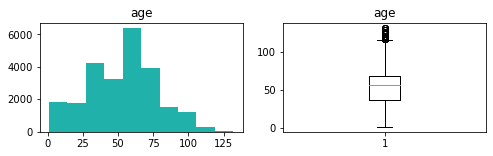

count    24509.000000
mean        53.611694
std         23.906653
min          1.000000
25%         36.000000
50%         57.000000
75%         68.000000
max        132.000000
Name: age, dtype: float64


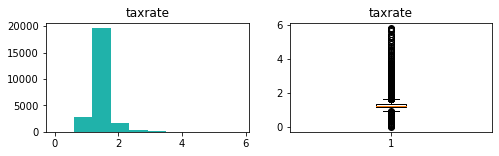

count    24509.000000
mean         1.355320
std          0.310879
min          0.022955
25%          1.208328
50%          1.246934
75%          1.379296
max          5.807694
Name: taxrate, dtype: float64


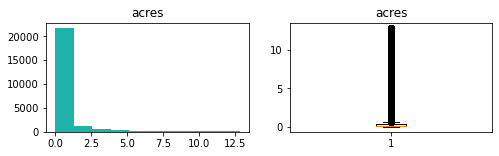

count    24509.000000
mean         0.689273
std          1.587130
min          0.020110
25%          0.139004
50%          0.172383
75%          0.368733
max         12.848600
Name: acres, dtype: float64


In [55]:
explore.explore_univariate(train, binary_vars, quant_vars)

### Bivariate Exploration

hot_month_sale 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=75701078.0, pvalue=0.12624251011259163)
       chi2   p-value  degrees of freedom
0  3.916381  0.270636                   3

expected:
              0            1            2            3
0  2894.104207  2893.631931  2893.631931  2893.631931
1  3233.895793  3233.368069  3233.368069  3233.368069


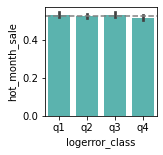


_____________________

has_heat 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=4894944.5, pvalue=0.01836043874128343)
        chi2   p-value  degrees of freedom
0  25.240765  0.000014                   3

expected:
              0            1            2            3
0    94.761598    94.746134    94.746134    94.746134
1  6033.238402  6032.253866  6032.253866  6032.253866


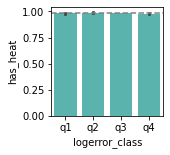


_____________________

cola 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=70240574.5, pvalue=0.09259337584700725)
         chi2       p-value  degrees of freedom
0  107.984362  2.979076e-23                   3

expected:
              0            1            2            3
0  3911.228692  3910.590436  3910.590436  3910.590436
1  2216.771308  2216.409564  2216.409564  2216.409564


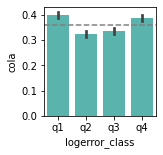


_____________________

bathroomcnt 
____________________



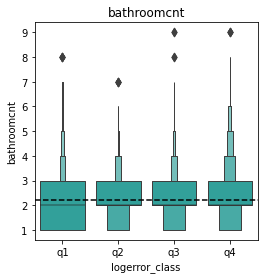

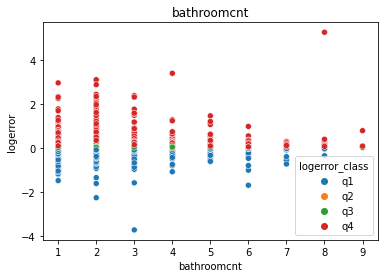

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean               2.108355     2.163702     2.223111     2.304717
std                0.948490     0.862466     0.904699     1.122449
min                1.000000     1.000000     1.000000     1.000000
25%                1.000000     2.000000     2.000000     2.000000
50%                2.000000     2.000000     2.000000     2.000000
75%                3.000000     3.000000     3.000000     3.000000
max                8.000000     7.000000     9.000000     9.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06159800928379229, pvalue=4.817881003476529e-22)

____________________

bedroomcnt 
____________________



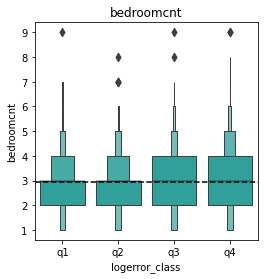

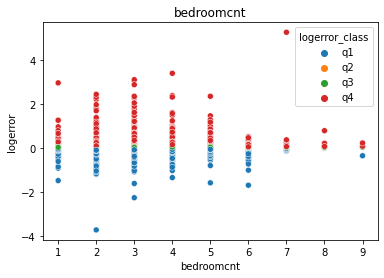

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean               2.870104     2.921169     2.956259     3.031663
std                0.941803     0.928291     0.974560     1.067877
min                1.000000     1.000000     1.000000     1.000000
25%                2.000000     2.000000     2.000000     2.000000
50%                3.000000     3.000000     3.000000     3.000000
75%                3.000000     3.000000     4.000000     4.000000
max                9.000000     8.000000     9.000000     9.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0536546326929055, pvalue=4.262351777736066e-17)

____________________

buildingqualitytypeid 
____________________



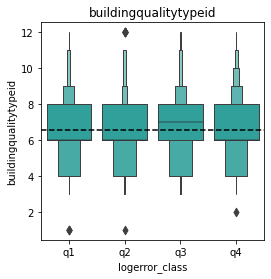

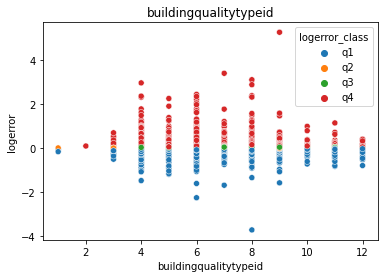

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean               6.471606     6.580545     6.645504     6.563245
std                1.714818     1.633393     1.625480     1.781908
min                1.000000     1.000000     3.000000     2.000000
25%                6.000000     6.000000     6.000000     6.000000
50%                6.000000     6.000000     7.000000     6.000000
75%                8.000000     8.000000     8.000000     8.000000
max               12.000000    12.000000    12.000000    12.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.015154439816563987, pvalue=0.017668359490743805)

____________________

calculatedfinishedsquarefeet 
____________________



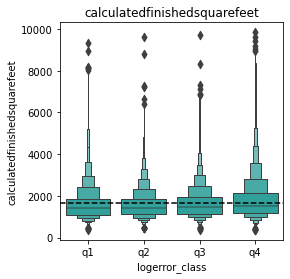

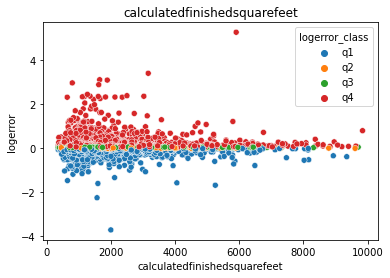

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean            1616.670366  1593.709483  1657.983026  1818.702301
std              837.614195   724.180030   781.720690  1058.634841
min              360.000000   440.000000   360.000000   360.000000
25%             1102.000000  1125.000000  1152.000000  1152.500000
50%             1405.000000  1426.000000  1468.000000  1524.000000
75%             1869.000000  1848.000000  1954.000000  2149.000000
max             9351.000000  9611.000000  9708.000000  9843.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.07053359713102166, pvalue=2.0621009633070855e-28)

____________________

latitude 
____________________



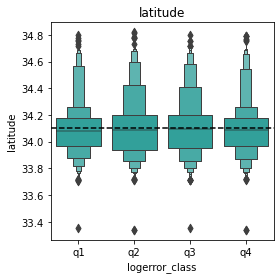

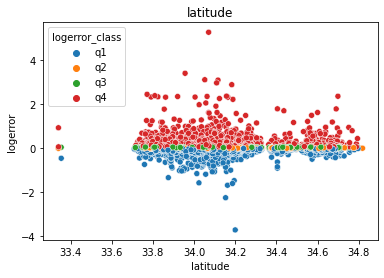

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean              34.099663    34.111473    34.112077    34.095301
std                0.207798     0.234369     0.227246     0.205037
min               33.354341    33.339527    33.354200    33.340851
25%               33.970481    33.938001    33.954400    33.966380
50%               34.080134    34.085409    34.092700    34.086554
75%               34.177795    34.203174    34.202000    34.174165
max               34.796863    34.818767    34.795811    34.794327 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.001537258942725804, pvalue=0.8098255079333726)

____________________

longitude 
____________________



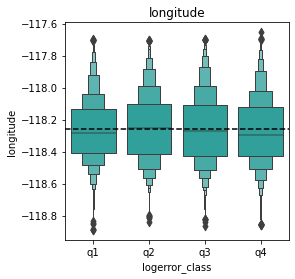

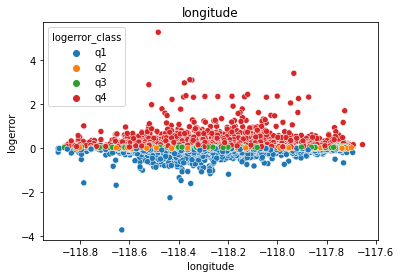

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean            -118.264349  -118.246362  -118.253073  -118.268772
std                0.199461     0.217387     0.222648     0.217485
min             -118.889223  -118.838792  -118.864797  -118.860949
25%             -118.408667  -118.413049  -118.425000  -118.425000
50%             -118.285523  -118.250516  -118.270268  -118.294312
75%             -118.131572  -118.099560  -118.105299  -118.121592
max             -117.693746  -117.699225  -117.693846  -117.653901 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0059287376433929265, pvalue=0.35334248568484994)

____________________

rawcensustractandblock 
____________________



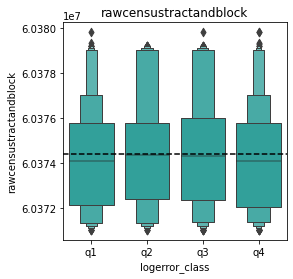

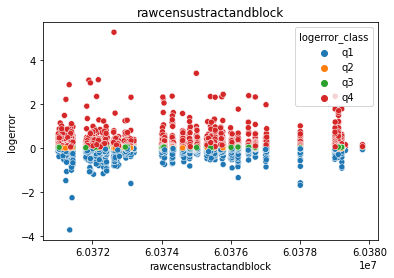

logerror_class            q1            q2            q3            q4
count           6.128000e+03  6.127000e+03  6.127000e+03  6.127000e+03
mean            6.037425e+07  6.037458e+07  6.037453e+07  6.037426e+07
std             2.425560e+03  2.531815e+03  2.541382e+03  2.428611e+03
min             6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%             6.037211e+07  6.037240e+07  6.037235e+07  6.037205e+07
50%             6.037407e+07  6.037433e+07  6.037431e+07  6.037408e+07
75%             6.037575e+07  6.037577e+07  6.037601e+07  6.037575e+07
max             6.037980e+07  6.037920e+07  6.037980e+07  6.037980e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0008071953772111915, pvalue=0.8994447148341804)

____________________

regionidcity 
____________________



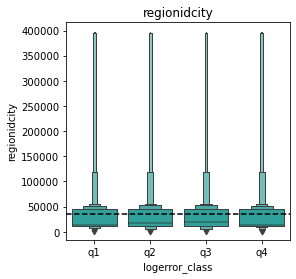

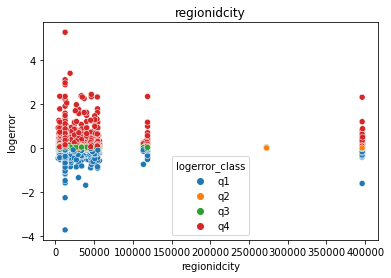

logerror_class             q1             q2             q3             q4
count             6128.000000    6127.000000    6127.000000    6127.000000
mean             35181.591221   36067.209401   35783.692509   33867.358250
std              60146.052263   59129.771486   57423.262443   55442.765482
min               3491.000000    3491.000000    3491.000000    3491.000000
25%              12447.000000   12447.000000   12447.000000   12447.000000
50%              12520.000000   16677.000000   19177.000000   13716.000000
75%              45457.000000   45602.000000   45888.000000   45457.000000
max             396556.000000  396556.000000  396556.000000  396556.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0046192531160679975, pvalue=0.4696017145288981)

____________________

regionidzip 
____________________



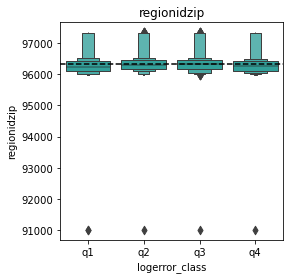

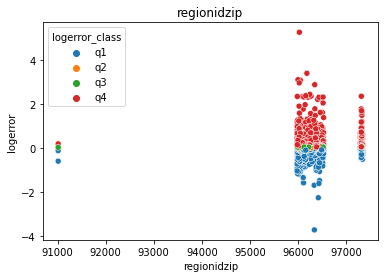

logerror_class            q1            q2            q3            q4
count            6128.000000   6127.000000   6127.000000   6127.000000
mean            96317.959367  96371.974539  96364.101028  96323.454382
std               346.642095    353.341614    341.451306    321.984367
min             91010.000000  91010.000000  91010.000000  91010.000000
25%             96101.000000  96161.000000  96159.000000  96117.000000
50%             96246.000000  96295.000000  96326.000000  96270.000000
75%             96414.000000  96447.000000  96447.000000  96424.000000
max             97344.000000  97344.000000  97344.000000  97344.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02695980162800705, pvalue=2.43001573706627e-05)

____________________

structuretaxvaluedollarcnt 
____________________



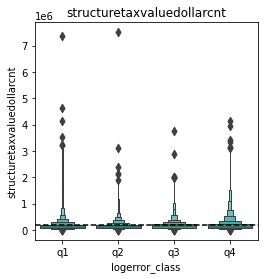

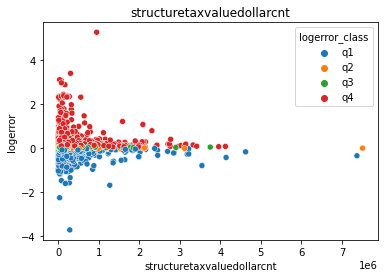

logerror_class            q1            q2            q3            q4
count           6.128000e+03  6.127000e+03  6.127000e+03  6.127000e+03
mean            1.757007e+05  1.703737e+05  1.794621e+05  2.006191e+05
std             2.402807e+05  1.867570e+05  1.805172e+05  2.679418e+05
min             3.282000e+03  1.631000e+03  3.883000e+03  1.320000e+02
25%             7.531150e+04  8.621450e+04  8.800000e+04  7.701850e+04
50%             1.247290e+05  1.323490e+05  1.368000e+05  1.285060e+05
75%             1.983875e+05  2.003690e+05  2.108040e+05  2.192560e+05
max             7.370009e+06  7.507773e+06  3.751075e+06  4.124979e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02255219661577582, pvalue=0.0004141570877331789)

____________________

landtaxvaluedollarcnt 
____________________



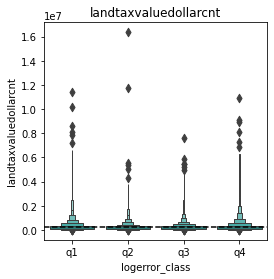

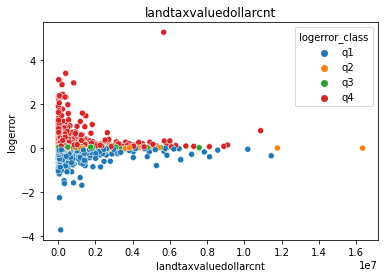

logerror_class            q1            q2            q3            q4
count           6.128000e+03  6.127000e+03  6.127000e+03  6.127000e+03
mean            3.029754e+05  2.514375e+05  2.646984e+05  3.257873e+05
std             5.316134e+05  4.036001e+05  3.620658e+05  5.613847e+05
min             1.393000e+03  5.152000e+03  4.107000e+03  3.080000e+03
25%             6.172100e+04  6.448200e+04  6.728150e+04  5.831700e+04
50%             1.730975e+05  1.731090e+05  1.782000e+05  1.734320e+05
75%             3.502415e+05  3.133030e+05  3.331135e+05  3.717665e+05
max             1.144260e+07  1.635060e+07  7.575829e+06  1.087925e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0020219660464128714, pvalue=0.7516002195496464)

____________________

age 
____________________



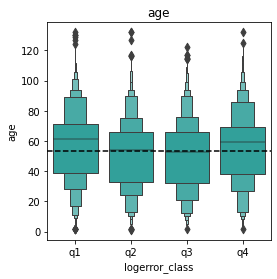

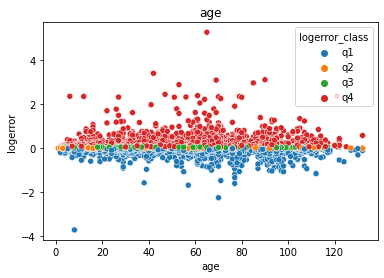

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean              57.786064    50.950710    50.170883    55.538436
std               24.144695    23.007157    23.432240    24.185898
min                2.000000     1.000000     2.000000     2.000000
25%               39.000000    33.000000    32.000000    38.000000
50%               61.000000    54.000000    53.000000    59.000000
75%               71.000000    66.000000    66.000000    69.000000
max              132.000000   132.000000   122.000000   132.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.038330084794168606, pvalue=1.9417208429407013e-09)

____________________

taxrate 
____________________



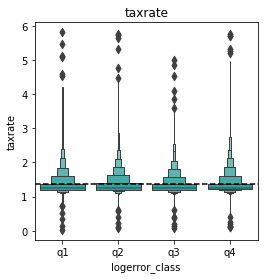

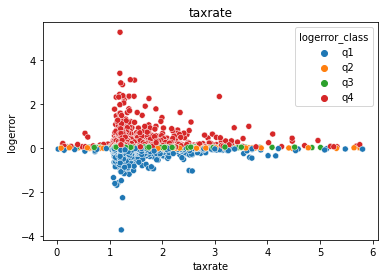

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean               1.358995     1.360250     1.344751     1.357282
std                0.320116     0.311662     0.279694     0.329605
min                0.022955     0.079206     0.085749     0.107132
25%                1.208428     1.207995     1.207809     1.208799
50%                1.245842     1.247851     1.245697     1.248005
75%                1.380790     1.386793     1.374574     1.375068
max                5.807694     5.757539     5.010001     5.755507 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.001995947136967057, pvalue=0.7546933172913517)

____________________

acres 
____________________



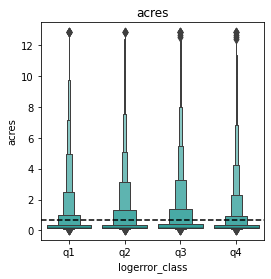

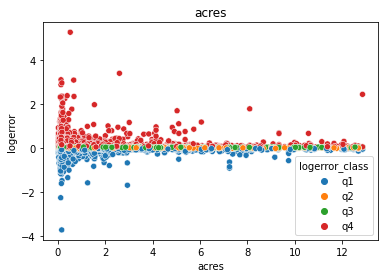

logerror_class           q1           q2           q3           q4
count           6128.000000  6127.000000  6127.000000  6127.000000
mean               0.658930     0.718129     0.755911     0.624126
std                1.547729     1.628313     1.688479     1.472721
min                0.020110     0.020546     0.021212     0.025826
25%                0.137804     0.139038     0.140289     0.139360
50%                0.171327     0.172153     0.173278     0.175758
75%                0.347744     0.345787     0.387994     0.376412
max               12.848600    12.848600    12.848600    12.847773 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.020745782852014335, pvalue=0.0011621563686685997)

____________________



In [56]:
explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

### Multivariate Exploration

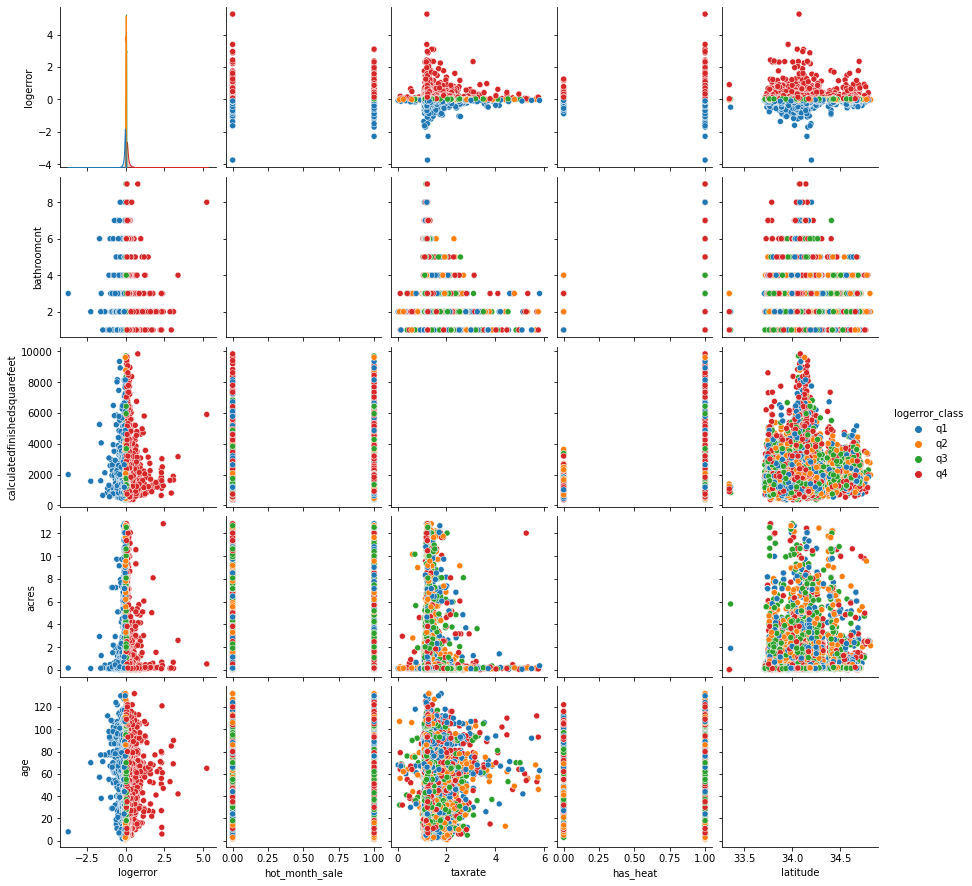

In [57]:
sns.pairplot(data = train, hue = 'logerror_class', 
             x_vars = ['logerror','hot_month_sale','taxrate', 'has_heat', 'latitude'
                       ],
             y_vars = ['logerror', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'acres', 'age'])

**Multivariate Takeways:**
- As acres increase, logerror tightens around 0
- The same is true for calculatedfinishedsquarefeet
- The same is true for tax rate

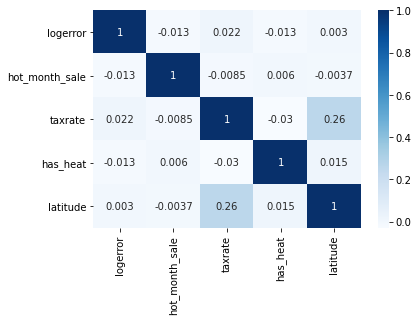

In [67]:
sns.heatmap(train[['logerror','hot_month_sale','taxrate', 'has_heat', 'latitude']].corr(), cmap='Blues', annot=True)
plt.show()

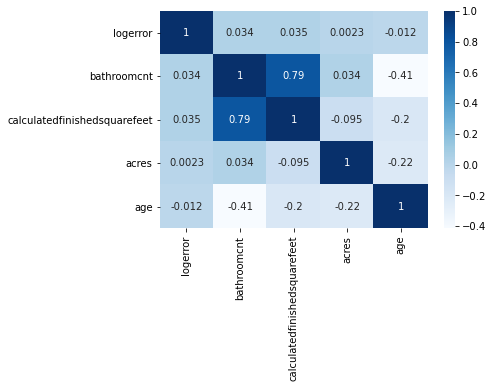

In [68]:
sns.heatmap(train[['logerror', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'acres', 'age']].corr(), cmap='Blues', annot=True)
plt.show()

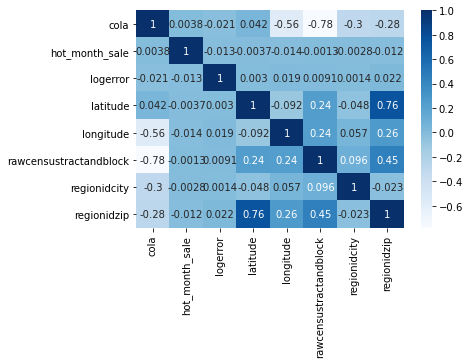

In [69]:
sns.heatmap(train[['cola','hot_month_sale', 'logerror','latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip']].corr(), cmap='Blues', annot=True)
plt.show()

In [65]:
#Set confidence interval and alpha for Pearson's Correlation Test
confidence_interval = 0.95
a = 1 - confidence_interval 

#Use personr function
corr, p = stats.pearsonr(train.hot_month_sale, train.logerror)

print(f"Pearson's correlation coefficient: {corr} and p-value is: {p}")
if p < a:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Pearson's correlation coefficient: -0.013400590109789477 and p-value is: 0.035914285507988856
We reject the null hypothesis.


In [ ]:
categorical_target = 'logerror_class'
continuous_target = 'logerror'
binary_vars = ['hot_month_sale', 'has_heat', 'cola']
quant_vars = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'rawcensustractandblock', 'regionidcity', 'regionidzip',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'age', 'taxrate', 'acres']